In [1]:
#https://www.canva.com/design/DAGH8W_1U4Y/OISjScRONqHb7ncB9wrkmQ/edit

In [2]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import requests
from io import StringIO
from io import BytesIO
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import geopandas as gpd
import plotly.express as px

# On recupère la DataFrame 

In [3]:
url_df = 'https://www.data.gouv.fr/fr/datasets/r/78348f03-a11c-4a6b-b8db-2acf4fee81b1'
req_df = requests.get(url_df)
data_df = StringIO(req_df.text)
df_2023 = pd.read_csv(data_df, sep='|')

df_2023

C:\Users\oumar\AppData\Local\Temp\ipykernel_17996\1713273855.py:4: DtypeWarning: Columns (14,18,23,24,26,28,29,31,32,33,41) have mixed types. Specify dtype option on import or set low_memory=False.
  df_2023 = pd.read_csv(data_df, sep='|')


Identifiant de document  Reference document  1 Articles CGI  \
0                            NaN                 NaN             NaN   
1                            NaN                 NaN             NaN   
2                            NaN                 NaN             NaN   
3                            NaN                 NaN             NaN   
4                            NaN                 NaN             NaN   
...                          ...                 ...             ...   
3727000                      NaN                 NaN             NaN   
3727001                      NaN                 NaN             NaN   
3727002                      NaN                 NaN             NaN   
3727003                      NaN                 NaN             NaN   
3727004                      NaN                 NaN             NaN   

         2 Articles CGI  3 Articles CGI  4 Articles CGI  5 Articles CGI  \
0                   NaN             NaN             NaN             NaN   
1                   NaN             NaN             NaN             NaN   
2                   NaN             NaN             NaN             NaN   
3                   NaN             NaN             NaN             NaN   
4                   NaN             NaN             NaN             NaN   
...                 ...             ...             ...             ...   
3727000             NaN             NaN             NaN             NaN   
3727001             NaN             NaN             NaN             NaN   
3727002             NaN             NaN             NaN             NaN   
3727003             NaN             NaN             NaN             NaN   
3727004             NaN             NaN             NaN             NaN   

         No disposition Date mutation Nature mutation  ...  \
0                     1    05/01/2023           Vente  ...   
1                     1    05/01/2023           Vente  ...   
2                     1    05/01/2023           Vente  ...   
3                     1    03/01/2023           Vente  ...   
4                     1    05/01/2023           Vente  ...   
...                 ...           ...             ...  ...   
3727000               1    05/10/2023    Adjudication  ...   
3727001               1    05/10/2023    Adjudication  ...   
3727002               1    05/10/2023    Adjudication  ...   
3727003               1    28/12/2023           Vente  ...   
3727004               1    28/12/2023           Vente  ...   

        Surface Carrez du 5eme lot  Nombre de lots Code type local  \
0                              NaN               1             3.0   
1                              NaN               1             3.0   
2                              NaN               1             2.0   
3                              NaN               0             1.0   
4                              NaN               0             1.0   
...                            ...             ...             ...   
3727000                        NaN               1             3.0   
3727001                        NaN               1             3.0   
3727002                        NaN               1             3.0   
3727003                        NaN               1             3.0   
3727004                        NaN               1             2.0   

          Type local Identifiant local Surface reelle bati  \
0        DÃ©pendance               NaN                 0.0   
1        DÃ©pendance               NaN                 0.0   
2        Appartement               NaN               233.0   
3             Maison               NaN                64.0   
4             Maison               NaN                73.0   
...              ...               ...                 ...   
3727000  DÃ©pendance               NaN                 0.0   
3727001  DÃ©pendance               NaN                 0.0   
3727002  DÃ©pendance               NaN                 0.0   
3727003  DÃ©pendance               Na

# La préparation des données
ajout d'une colonne: Surface Crrez Totale qui regroupe toutes mles surface carrez en 1

In [4]:
ColonneCarrez = [
    'Surface Carrez du 1er lot',
    'Surface Carrez du 2eme lot',
    'Surface Carrez du 3eme lot',
    'Surface Carrez du 4eme lot',
    'Surface Carrez du 5eme lot'
]

# Remplir les NaN avec 0 pour les colonnes Surface Carrez
df_2023.loc[:, ColonneCarrez] = df_2023.loc[:,ColonneCarrez].fillna(0)
df_2023[ColonneCarrez] = df_2023[ColonneCarrez].replace(',', '.', regex=True).astype(float)

df_2023['Surface Carrez Totale'] = df_2023[ColonneCarrez].sum(axis=1)
df_2023 = df_2023.drop(columns=ColonneCarrez)

on supprime toutes les colonnes avec au moins 70% de NaN.

Lorsque nous n'avons pas d'information sur la surface terrain nous lui atribuons la surface reelle bati

In [5]:
col_meanNA = df_2023.isna().mean()

df_cleaned_2023 = df_2023.loc[:, col_meanNA < 0.7]

df_cleaned_2023.loc[:,"Surface terrain"] = df_cleaned_2023.loc[:,"Surface terrain"].fillna(df_cleaned_2023["Surface reelle bati"])

df_cleaned_2023 = df_cleaned_2023.apply(lambda col: col.fillna(0) if col.dtype in [np.float64, np.int64] else col.fillna('0'))

df_cleaned_2023 = df_cleaned_2023.drop_duplicates()

df_cleaned_2023

No disposition Date mutation Nature mutation Valeur fonciere  \
0                     1    05/01/2023           Vente      1070000,00   
1                     1    05/01/2023           Vente      1070000,00   
2                     1    05/01/2023           Vente      1070000,00   
3                     1    03/01/2023           Vente       152200,00   
4                     1    05/01/2023           Vente       269000,00   
...                 ...           ...             ...             ...   
3727000               1    05/10/2023    Adjudication      3931000,00   
3727001               1    05/10/2023    Adjudication      3931000,00   
3727002               1    05/10/2023    Adjudication      3931000,00   
3727003               1    28/12/2023           Vente        98250,00   
3727004               1    28/12/2023           Vente        98250,00   

         No voie Type de voie Code voie               Voie  Code postal  \
0          184.0          ALL      0124         DES HETRES       1630.0   
1          159.0          ALL      0124         DES HETRES       1630.0   
2          159.0          ALL      0124         DES HETRES       1630.0   
3         2914.0          RTE      0107          DE PONCIN       1450.0   
4          427.0          CHE      0040       DE L'AUBEPIN       1800.0   
...          ...          ...       ...                ...          ...   
3727000     39.0           AV    1832.0    CHARLES FLOQUET      75007.0   
3727001     39.0           AV    1832.0    CHARLES FLOQUET      75007.0   
3727002     39.0           AV    1832.0    CHARLES FLOQUET      75007.0   
3727003     66.0          RUE    8892.0  SEBASTIEN MERCIER      75015.0   
3727004     66.0          RUE    8892.0  SEBASTIEN MERCIER      75015.0   

                     Commune  ... No plan  1er lot Nombre de lots  \
0           ST-GENIS-POUILLY  ...     334       29              1   
1           ST-GENIS-POUILLY  ...     336        8              1   
2           ST-GENIS-POUILLY  ...     336       22              1   
3          SERRIERES-SUR-AIN  ...    2317        0              0   
4        SAINT-JEAN-DE-NIOST  ...    2405        0              0   
...                      ...  ...     ...      ...            ...   
3727000             PARIS 07  ...       4       17              1   
3727001             PARIS 07  ...       4       20              1   
3727002             PARIS 07  ...       4       10              1   
3727003             PARIS 15  ...     100       26              1   
3727004             PARIS 15  ...     100       26              1   

         Code type local   Type local  Surface reelle bati  \
0                    3.0  DÃ©pendance                  0.0   
1                    3.0  DÃ©pendance                  0.0   
2                    2.0  Appartement                233.0   
3                    1.0       Maison                 64.0   
4                    1.0       Maison                 73.0   
...                  ...          ...                  ...   
3727000              3.0  DÃ©pendance                  0.0   
3727001              3.0  DÃ©pendance                  0.0   
3727002              3.0  DÃ©pendance                  0.0   
3727003              3.0  DÃ©pendance                  0.0   
3727004              2.0  Appartement                 18.0   

         Nombre pieces principales Nature culture  Surface terrain  \
0                              0.0              0              0.0   
1                              0.0              0              0.0   
2                              8.0              0            233.0   
3                              3.0              S            988.0   
4                              3.0              S            835.0   
...                            ...            ...              ...   
3727000                        0.0              0              0.0   
3727001                        0.0              0              0.0   
3727002                    

In [6]:
df_cleaned_2023.dtypes

No disposition                 int64
Date mutation                 object
Nature mutation               object
Valeur fonciere               object
No voie                      float64
Type de voie                  object
Code voie                     object
Voie                          object
Code postal                  float64
Commune                       object
Code departement              object
Code commune                   int64
Section                       object
No plan                        int64
1er lot                       object
Nombre de lots                 int64
Code type local              float64
Type local                    object
Surface reelle bati          float64
Nombre pieces principales    float64
Nature culture                object
Surface terrain              float64
Surface Carrez Totale        float64
dtype: object

on change le type

In [7]:
df_cleaned_2023['Valeur fonciere'] = df_cleaned_2023['Valeur fonciere'].str.replace(',', '.')
df_cleaned_2023['Valeur fonciere'] = df_cleaned_2023['Valeur fonciere'].astype(float)
df_cleaned_2023

No disposition Date mutation Nature mutation  Valeur fonciere  \
0                     1    05/01/2023           Vente        1070000.0   
1                     1    05/01/2023           Vente        1070000.0   
2                     1    05/01/2023           Vente        1070000.0   
3                     1    03/01/2023           Vente         152200.0   
4                     1    05/01/2023           Vente         269000.0   
...                 ...           ...             ...              ...   
3727000               1    05/10/2023    Adjudication        3931000.0   
3727001               1    05/10/2023    Adjudication        3931000.0   
3727002               1    05/10/2023    Adjudication        3931000.0   
3727003               1    28/12/2023           Vente          98250.0   
3727004               1    28/12/2023           Vente          98250.0   

         No voie Type de voie Code voie               Voie  Code postal  \
0          184.0          ALL      0124         DES HETRES       1630.0   
1          159.0          ALL      0124         DES HETRES       1630.0   
2          159.0          ALL      0124         DES HETRES       1630.0   
3         2914.0          RTE      0107          DE PONCIN       1450.0   
4          427.0          CHE      0040       DE L'AUBEPIN       1800.0   
...          ...          ...       ...                ...          ...   
3727000     39.0           AV    1832.0    CHARLES FLOQUET      75007.0   
3727001     39.0           AV    1832.0    CHARLES FLOQUET      75007.0   
3727002     39.0           AV    1832.0    CHARLES FLOQUET      75007.0   
3727003     66.0          RUE    8892.0  SEBASTIEN MERCIER      75015.0   
3727004     66.0          RUE    8892.0  SEBASTIEN MERCIER      75015.0   

                     Commune  ... No plan  1er lot Nombre de lots  \
0           ST-GENIS-POUILLY  ...     334       29              1   
1           ST-GENIS-POUILLY  ...     336        8              1   
2           ST-GENIS-POUILLY  ...     336       22              1   
3          SERRIERES-SUR-AIN  ...    2317        0              0   
4        SAINT-JEAN-DE-NIOST  ...    2405        0              0   
...                      ...  ...     ...      ...            ...   
3727000             PARIS 07  ...       4       17              1   
3727001             PARIS 07  ...       4       20              1   
3727002             PARIS 07  ...       4       10              1   
3727003             PARIS 15  ...     100       26              1   
3727004             PARIS 15  ...     100       26              1   

         Code type local   Type local  Surface reelle bati  \
0                    3.0  DÃ©pendance                  0.0   
1                    3.0  DÃ©pendance                  0.0   
2                    2.0  Appartement                233.0   
3                    1.0       Maison                 64.0   
4                    1.0       Maison                 73.0   
...                  ...          ...                  ...   
3727000              3.0  DÃ©pendance                  0.0   
3727001              3.0  DÃ©pendance                  0.0   
3727002              3.0  DÃ©pendance                  0.0   
3727003              3.0  DÃ©pendance                  0.0   
3727004              2.0  Appartement                 18.0   

         Nombre pieces principales Nature culture  Surface terrain  \
0                              0.0              0              0.0   
1                              0.0              0              0.0   
2                              8.0              0            233.0   
3                              3.0              S            988.0   
4                              3.0              S            835.0   
...                            ...            ...              ...   
3727000                        0.0              0              0.0   
3727001                        0.0              0              0.0   
3727002        

In [8]:
df_cleaned_2023.loc[df_cleaned_2023['Code departement'] == '2A', 'Code departement'] = 200
df_cleaned_2023.loc[df_cleaned_2023['Code departement'] == '2B', 'Code departement'] = 201

on change le type de la date

In [9]:
df_cleaned_2023['Date mutation'] = pd.to_datetime(df_cleaned_2023['Date mutation'], format='%d/%m/%Y')

--------------------------------------------------------------------------------------------------------------------------------

# Ajout d'une dataFrame ville pour ajouter à nos colonnes la latitude longitude et code_insee

In [10]:
#ville = "https://www.data.gouv.fr/fr/datasets/r/51606633-fb13-4820-b795-9a2a575a72f1"

In [11]:
'''req_ville = requests.get(ville)
data_ville = StringIO(req_ville.text)
df_ville = pd.read_csv(data_ville, sep=',')'''

"req_ville = requests.get(ville)\ndata_ville = StringIO(req_ville.text)\ndf_ville = pd.read_csv(data_ville, sep=',')"

In [12]:
#df_ville

In [13]:
'''new_cols = {"city_code": "Commune","zip_code":"Code postal"}
df_ville.rename(columns=new_cols,inplace=True)
df_ville["Commune"] = df_ville["Commune"].str.upper()
df_ville = df_ville.drop(columns = ["department_name","department_number","region_name","region_geojson_name","Code postal","label"])'''

'new_cols = {"city_code": "Commune","zip_code":"Code postal"}\ndf_ville.rename(columns=new_cols,inplace=True)\ndf_ville["Commune"] = df_ville["Commune"].str.upper()\ndf_ville = df_ville.drop(columns = ["department_name","department_number","region_name","region_geojson_name","Code postal","label"])'

In [14]:
 #df_ville

In [15]:
df_cleaned_2023["Commune"] = df_cleaned_2023["Commune"].str.replace('-',' ')
df_cleaned_2023["Commune"] = df_cleaned_2023["Commune"].str.replace('SAINT','ST')
df_cleaned_2023["Commune"]

0           ST GENIS POUILLY
1           ST GENIS POUILLY
2           ST GENIS POUILLY
3          SERRIERES SUR AIN
4           ST JEAN DE NIOST
                 ...        
3727000             PARIS 07
3727001             PARIS 07
3727002             PARIS 07
3727003             PARIS 15
3727004             PARIS 15
Name: Commune, Length: 3450892, dtype: object

In [16]:
#df_cleaned_2023 = pd.merge(df_cleaned_2023,df_ville, on="Commune", how="inner")

In [17]:
df_cleaned_2023

No disposition Date mutation Nature mutation  Valeur fonciere  \
0                     1    2023-01-05           Vente        1070000.0   
1                     1    2023-01-05           Vente        1070000.0   
2                     1    2023-01-05           Vente        1070000.0   
3                     1    2023-01-03           Vente         152200.0   
4                     1    2023-01-05           Vente         269000.0   
...                 ...           ...             ...              ...   
3727000               1    2023-10-05    Adjudication        3931000.0   
3727001               1    2023-10-05    Adjudication        3931000.0   
3727002               1    2023-10-05    Adjudication        3931000.0   
3727003               1    2023-12-28           Vente          98250.0   
3727004               1    2023-12-28           Vente          98250.0   

         No voie Type de voie Code voie               Voie  Code postal  \
0          184.0          ALL      0124         DES HETRES       1630.0   
1          159.0          ALL      0124         DES HETRES       1630.0   
2          159.0          ALL      0124         DES HETRES       1630.0   
3         2914.0          RTE      0107          DE PONCIN       1450.0   
4          427.0          CHE      0040       DE L'AUBEPIN       1800.0   
...          ...          ...       ...                ...          ...   
3727000     39.0           AV    1832.0    CHARLES FLOQUET      75007.0   
3727001     39.0           AV    1832.0    CHARLES FLOQUET      75007.0   
3727002     39.0           AV    1832.0    CHARLES FLOQUET      75007.0   
3727003     66.0          RUE    8892.0  SEBASTIEN MERCIER      75015.0   
3727004     66.0          RUE    8892.0  SEBASTIEN MERCIER      75015.0   

                   Commune  ... No plan  1er lot Nombre de lots  \
0         ST GENIS POUILLY  ...     334       29              1   
1         ST GENIS POUILLY  ...     336        8              1   
2         ST GENIS POUILLY  ...     336       22              1   
3        SERRIERES SUR AIN  ...    2317        0              0   
4         ST JEAN DE NIOST  ...    2405        0              0   
...                    ...  ...     ...      ...            ...   
3727000           PARIS 07  ...       4       17              1   
3727001           PARIS 07  ...       4       20              1   
3727002           PARIS 07  ...       4       10              1   
3727003           PARIS 15  ...     100       26              1   
3727004           PARIS 15  ...     100       26              1   

         Code type local   Type local  Surface reelle bati  \
0                    3.0  DÃ©pendance                  0.0   
1                    3.0  DÃ©pendance                  0.0   
2                    2.0  Appartement                233.0   
3                    1.0       Maison                 64.0   
4                    1.0       Maison                 73.0   
...                  ...          ...                  ...   
3727000              3.0  DÃ©pendance                  0.0   
3727001              3.0  DÃ©pendance                  0.0   
3727002              3.0  DÃ©pendance                  0.0   
3727003              3.0  DÃ©pendance                  0.0   
3727004              2.0  Appartement                 18.0   

         Nombre pieces principales Nature culture  Surface terrain  \
0                              0.0              0              0.0   
1                              0.0              0              0.0   
2                              8.0              0            233.0   
3                              3.0              S            988.0   
4                              3.0              S            835.0   
...                            ...            ...              ...   
3727000                        0.0              0              0.0   
3727001                        0.0              0              0.0   
3727002                        0.0     

In [18]:
#df_cleaned_2023.loc[df_cleaned_2023['insee_code'].str.startswith('2A'), 'insee_code'] = df_cleaned_2023['insee_code'].replace('2A', '200', regex=True)
#df_cleaned_2023.loc[df_cleaned_2023['insee_code'].str.startswith('2B'), 'insee_code'] = df_cleaned_2023['insee_code'].replace('2B', '201', regex=True)

In [19]:
#suppression des lignes où la latitude et longitude sont à 0
'''df_cleaned_2023 = df_cleaned_2023[df_cleaned_2023['latitude'] > 0]
df_cleaned_2023 = df_cleaned_2023[df_cleaned_2023['Code postal'] > 0]'''

"df_cleaned_2023 = df_cleaned_2023[df_cleaned_2023['latitude'] > 0]\ndf_cleaned_2023 = df_cleaned_2023[df_cleaned_2023['Code postal'] > 0]"

------------------------------------------------------------------------------------------------------------------

# Ajout d'une dataFrame nb_habitants pour obtenir le nombre d'habitants pour chaque ville

In [20]:
#nb_habitants = "https://www.insee.fr/fr/statistiques/fichier/3698339/base-pop-historiques-1876-2021.xlsx"

In [21]:
'''req_nb_habitants = requests.get(nb_habitants)
data_nb_habitants = BytesIO(req_nb_habitants.content)
xls = pd.ExcelFile(data_nb_habitants)
df_nb_habitants = pd.read_excel(data_nb_habitants, sheet_name=xls.sheet_names[0],skiprows=4)'''

'req_nb_habitants = requests.get(nb_habitants)\ndata_nb_habitants = BytesIO(req_nb_habitants.content)\nxls = pd.ExcelFile(data_nb_habitants)\ndf_nb_habitants = pd.read_excel(data_nb_habitants, sheet_name=xls.sheet_names[0],skiprows=4)'

In [22]:
'''df_nb_habitants.rename(columns={"Libellé géographique":"Commune"},inplace=True)
start_col_index = df_nb_habitants.columns.get_loc('Population en 2020')

df_nb_habitants = df_nb_habitants.drop(df_nb_habitants.columns[start_col_index:], axis=1)

df_nb_habitants["Commune"] = df_nb_habitants["Commune"].str.replace('é','e')
df_nb_habitants["Commune"] = df_nb_habitants["Commune"].str.upper()

df_nb_habitants = df_nb_habitants.drop(columns = ["Région","Département","Code géographique"])

df_nb_habitants["Commune"] = df_nb_habitants["Commune"].str.replace('-',' ')
df_nb_habitants["Commune"] = df_nb_habitants["Commune"].str.replace('SAINT','ST')'''

'df_nb_habitants.rename(columns={"Libellé géographique":"Commune"},inplace=True)\nstart_col_index = df_nb_habitants.columns.get_loc(\'Population en 2020\')\n\ndf_nb_habitants = df_nb_habitants.drop(df_nb_habitants.columns[start_col_index:], axis=1)\n\ndf_nb_habitants["Commune"] = df_nb_habitants["Commune"].str.replace(\'é\',\'e\')\ndf_nb_habitants["Commune"] = df_nb_habitants["Commune"].str.upper()\n\ndf_nb_habitants = df_nb_habitants.drop(columns = ["Région","Département","Code géographique"])\n\ndf_nb_habitants["Commune"] = df_nb_habitants["Commune"].str.replace(\'-\',\' \')\ndf_nb_habitants["Commune"] = df_nb_habitants["Commune"].str.replace(\'SAINT\',\'ST\')'

In [23]:
#df_cleaned_2023 = pd.merge(df_cleaned_2023,df_nb_habitants, on="Commune", how="inner")

In [24]:
df_cleaned_2023

No disposition Date mutation Nature mutation  Valeur fonciere  \
0                     1    2023-01-05           Vente        1070000.0   
1                     1    2023-01-05           Vente        1070000.0   
2                     1    2023-01-05           Vente        1070000.0   
3                     1    2023-01-03           Vente         152200.0   
4                     1    2023-01-05           Vente         269000.0   
...                 ...           ...             ...              ...   
3727000               1    2023-10-05    Adjudication        3931000.0   
3727001               1    2023-10-05    Adjudication        3931000.0   
3727002               1    2023-10-05    Adjudication        3931000.0   
3727003               1    2023-12-28           Vente          98250.0   
3727004               1    2023-12-28           Vente          98250.0   

         No voie Type de voie Code voie               Voie  Code postal  \
0          184.0          ALL      0124         DES HETRES       1630.0   
1          159.0          ALL      0124         DES HETRES       1630.0   
2          159.0          ALL      0124         DES HETRES       1630.0   
3         2914.0          RTE      0107          DE PONCIN       1450.0   
4          427.0          CHE      0040       DE L'AUBEPIN       1800.0   
...          ...          ...       ...                ...          ...   
3727000     39.0           AV    1832.0    CHARLES FLOQUET      75007.0   
3727001     39.0           AV    1832.0    CHARLES FLOQUET      75007.0   
3727002     39.0           AV    1832.0    CHARLES FLOQUET      75007.0   
3727003     66.0          RUE    8892.0  SEBASTIEN MERCIER      75015.0   
3727004     66.0          RUE    8892.0  SEBASTIEN MERCIER      75015.0   

                   Commune  ... No plan  1er lot Nombre de lots  \
0         ST GENIS POUILLY  ...     334       29              1   
1         ST GENIS POUILLY  ...     336        8              1   
2         ST GENIS POUILLY  ...     336       22              1   
3        SERRIERES SUR AIN  ...    2317        0              0   
4         ST JEAN DE NIOST  ...    2405        0              0   
...                    ...  ...     ...      ...            ...   
3727000           PARIS 07  ...       4       17              1   
3727001           PARIS 07  ...       4       20              1   
3727002           PARIS 07  ...       4       10              1   
3727003           PARIS 15  ...     100       26              1   
3727004           PARIS 15  ...     100       26              1   

         Code type local   Type local  Surface reelle bati  \
0                    3.0  DÃ©pendance                  0.0   
1                    3.0  DÃ©pendance                  0.0   
2                    2.0  Appartement                233.0   
3                    1.0       Maison                 64.0   
4                    1.0       Maison                 73.0   
...                  ...          ...                  ...   
3727000              3.0  DÃ©pendance                  0.0   
3727001              3.0  DÃ©pendance                  0.0   
3727002              3.0  DÃ©pendance                  0.0   
3727003              3.0  DÃ©pendance                  0.0   
3727004              2.0  Appartement                 18.0   

         Nombre pieces principales Nature culture  Surface terrain  \
0                              0.0              0              0.0   
1                              0.0              0              0.0   
2                              8.0              0            233.0   
3                              3.0              S            988.0   
4                              3.0              S            835.0   
...                            ...            ...              ...   
3727000                        0.0              0              0.0   
3727001                        0.0              0              0.0   
3727002                        0.0     

-----------------------------------------------------------------------------------------------------------------------

# Dernier nettoyage de notre DataFrame
on nettoie notre dataFrame en s'assurant qu'il n'y ai plus de NaN dans nos colonnes et on supprime tous les lignes qui ont une surface relle bati et une valeur foncière nulle.
Ainsi on va pouvoir calculer une colonne Prix au m²

In [25]:
df_cleaned_2023.dropna(subset=["Valeur fonciere","Surface reelle bati"], inplace = True)
df_cleaned_2023 = df_cleaned_2023[df_cleaned_2023['Surface reelle bati']>0]

In [26]:
#on s'assure que toutes les lignes ont une valeur foncière
df_cleaned_2023 = df_cleaned_2023[df_cleaned_2023['Valeur fonciere']>0]

#ajout de la colonne prix au m²
df_cleaned_2023["Prix au m²"] = df_cleaned_2023["Valeur fonciere"] / df_cleaned_2023["Surface reelle bati"]

on supprime les colonnes que nous supposons peu interprétable ou necessaire d'utiliser

In [27]:
df_cleaned_2023= df_cleaned_2023.drop(columns = ["No disposition", "No voie", "Type de voie", "Code voie", "Voie", "Commune","Nature culture", "1er lot"])

In [28]:
df_cleaned_2023

Date mutation Nature mutation  Valeur fonciere  Code postal  \
2          2023-01-05           Vente        1070000.0       1630.0   
3          2023-01-03           Vente         152200.0       1450.0   
4          2023-01-05           Vente         269000.0       1800.0   
7          2023-01-03           Vente         770000.0       1210.0   
14         2023-01-06           Vente          85520.0       1340.0   
...               ...             ...              ...          ...   
3726993    2023-03-02    Adjudication         145000.0      75016.0   
3726994    2023-02-16    Adjudication         212000.0      75015.0   
3726995    2023-02-16    Adjudication         144000.0      75015.0   
3726998    2023-10-05    Adjudication        3931000.0      75007.0   
3727004    2023-12-28           Vente          98250.0      75015.0   

        Code departement  Code commune Section  No plan  Nombre de lots  \
2                      1           354      BD      336               1   
3                      1           404       D     2317               0   
4                      1           361       B     2405               0   
7                      1           281      AD       41               0   
14                     1            24      AI      127               0   
...                  ...           ...     ...      ...             ...   
3726993               75           116      FK      122               2   
3726994               75           115      AK        1               1   
3726995               75           115      AK        1               1   
3726998               75           107      BU        4               3   
3727004               75           115      FV      100               1   

         Code type local   Type local  Surface reelle bati  \
2                    2.0  Appartement                233.0   
3                    1.0       Maison                 64.0   
4                    1.0       Maison                 73.0   
7                    1.0       Maison                136.0   
14                   1.0       Maison                160.0   
...                  ...          ...                  ...   
3726993              2.0  Appartement                 18.0   
3726994              2.0  Appartement                 26.0   
3726995              2.0  Appartement                 15.0   
3726998              2.0  Appartement                206.0   
3727004              2.0  Appartement                 18.0   

         Nombre pieces principales  Surface terrain  Surface Carrez Totale  \
2                              8.0            233.0                    0.0   
3                              3.0            988.0                    0.0   
4                              3.0            835.0                    0.0   
7                              7.0            921.0                    0.0   
14                             5.0            160.0                    0.0   
...                            ...              ...                    ...   
3726993                        2.0             18.0                    0.0   
3726994                        1.0             26.0                    0.0   
3726995                        1.0             15.0                    0.0   
3726998                        6.0            206.0                    0.0   
3727004                        1.0             18.0                    0.0   

           Prix au m²  
2         4592.274678  
3         2378.125000  
4         3684.931507  
7         5661.764706  
14         534.500000  
...               ...  
3726993   8055.555556  
3726994   8153.846154  
3726995   9600.000000  
3726998  19082.524272  
3727004   5458.333333  

[1136947 rows x 16 columns]

--------------------------------------------------------------------------------------------------------------------------

# Encodage de nos dernières variables de type objet

In [29]:
reference_date = pd.Timestamp("2023-01-01")
# Convertir la date en nombre de jours écoulés depuis la date de référence
df_cleaned_2023['Date_numeric'] = (df_cleaned_2023['Date mutation'] - reference_date) // pd.Timedelta('1D')
df_cleaned_2023.drop('Date mutation', axis=1, inplace=True)

In [30]:
frequency_nature_mutation = df_cleaned_2023['Nature mutation'].value_counts(normalize=True)

# Remplacer chaque valeur par sa fréquence respective
df_cleaned_2023['nature_mutation_encoded'] = df_cleaned_2023['Nature mutation'].map(frequency_nature_mutation)
df_cleaned_2023 = df_cleaned_2023.drop(columns=["Nature mutation","Type local"])
# Afficher le DataFrame résultant

df_cleaned_2023['Code departement'] = df_cleaned_2023['Code departement'].astype(float)
#df_cleaned_2023['insee_code'] = df_cleaned_2023['insee_code'].astype(float)
#df_cleaned_2023['Population en 2021'] = df_cleaned_2023['Population en 2021'].astype(float)

df_cleaned_2023.dtypes

Valeur fonciere              float64
Code postal                  float64
Code departement             float64
Code commune                   int64
Section                       object
No plan                        int64
Nombre de lots                 int64
Code type local              float64
Surface reelle bati          float64
Nombre pieces principales    float64
Surface terrain              float64
Surface Carrez Totale        float64
Prix au m²                   float64
Date_numeric                   int64
nature_mutation_encoded      float64
dtype: object

In [31]:
lencoder = LabelEncoder()
df_cleaned_2023["Section"] = lencoder.fit_transform(df_cleaned_2023["Section"])
df_cleaned_2023["Section"] = df_cleaned_2023["Section"].astype(float)

on s'assure qu'il n'y a plus de duplication

In [32]:
df_cleaned_2023 = df_cleaned_2023.drop_duplicates()
df_cleaned_2023

Valeur fonciere  Code postal  Code departement  Code commune  \
2              1070000.0       1630.0               1.0           354   
3               152200.0       1450.0               1.0           404   
4               269000.0       1800.0               1.0           361   
7               770000.0       1210.0               1.0           281   
14               85520.0       1340.0               1.0            24   
...                  ...          ...               ...           ...   
3726993         145000.0      75016.0              75.0           116   
3726994         212000.0      75015.0              75.0           115   
3726995         144000.0      75015.0              75.0           115   
3726998        3931000.0      75007.0              75.0           107   
3727004          98250.0      75015.0              75.0           115   

         Section  No plan  Nombre de lots  Code type local  \
2           32.0      336               1              2.0   
3           82.0     2317               0              1.0   
4           28.0     2405               0              1.0   
7            5.0       41               0              1.0   
14          10.0      127               0              1.0   
...          ...      ...             ...              ...   
3726993    147.0      122               2              2.0   
3726994     12.0        1               1              2.0   
3726995     12.0        1               1              2.0   
3726998     49.0        4               3              2.0   
3727004    158.0      100               1              2.0   

         Surface reelle bati  Nombre pieces principales  Surface terrain  \
2                      233.0                        8.0            233.0   
3                       64.0                        3.0            988.0   
4                       73.0                        3.0            835.0   
7                      136.0                        7.0            921.0   
14                     160.0                        5.0            160.0   
...                      ...                        ...              ...   
3726993                 18.0                        2.0             18.0   
3726994                 26.0                        1.0             26.0   
3726995                 15.0                        1.0             15.0   
3726998                206.0                        6.0            206.0   
3727004                 18.0                        1.0             18.0   

         Surface Carrez Totale    Prix au m²  Date_numeric  \
2                          0.0   4592.274678             4   
3                          0.0   2378.125000             2   
4                          0.0   3684.931507             4   
7                          0.0   5661.764706             2   
14                         0.0    534.500000             5   
...                        ...           ...           ...   
3726993                    0.0   8055.555556            60   
3726994                    0.0   8153.846154            46   
3726995                    0.0   9600.000000            46   
3726998                    0.0  19082.524272           277   
3727004                    0.0   5458.333333           361   

         nature_mutation_encoded  
2                       0.991240  
3                       0.991240  
4                       0.991240  
7                       0.991240  
14                      0.991240  
...                          ...  
3726993                 0.002138  
3726994                 0.002138  
3726995                 0.002138  
3726998                 0.002138  
3727004                 0.991240  

[1124011 rows x 15 columns]

# Boxplot des différentes variables

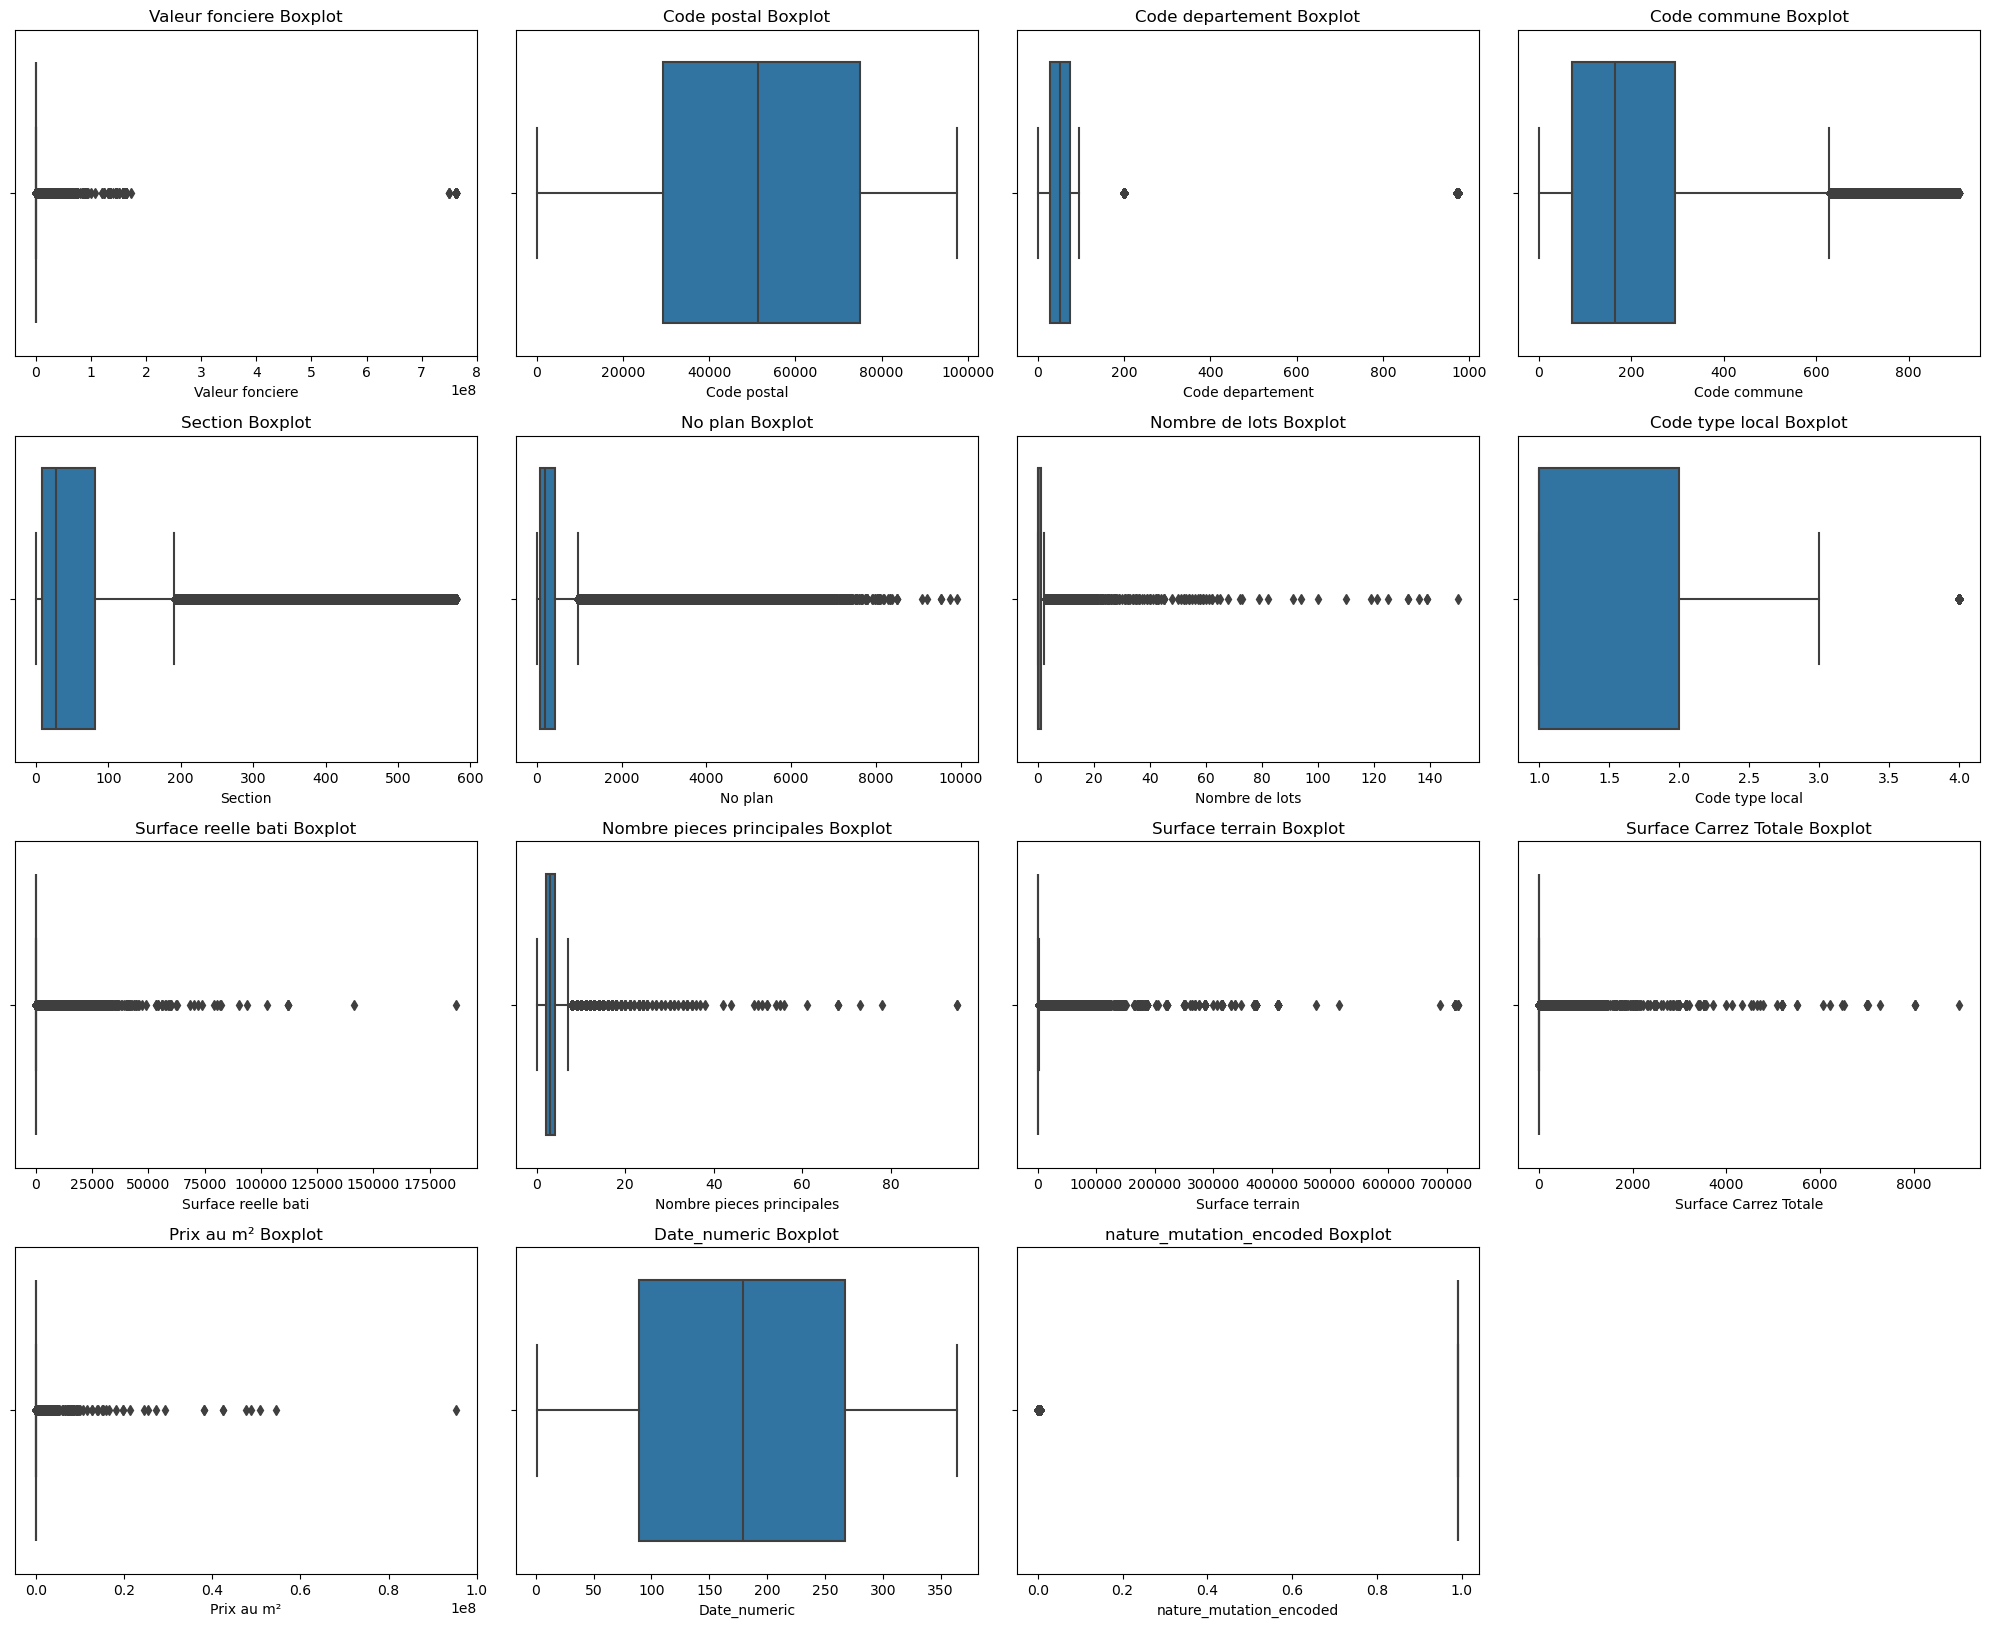

In [33]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
num_columns = len(df_cleaned_2023.columns)
plt.figure(figsize=(20, 20))

for i, col in enumerate(df_cleaned_2023.columns):
    plt.subplot(5, 4, i + 1)
    sns.boxplot(x=df_cleaned_2023[col])
    plt.title(f'{col} Boxplot')
plt.tight_layout()

plt.show()

Par exemple, pour le nombre de pièces principales, on peut voir grâce au box plot que la moyenne est d'environ de 2 pièces

On peut également en déduire les valeurs aberrantes qui sont representées par les losanges

# Retirer les valeurs aberrantes
Grace aux boxPlot on peut maintenant de retirer les valeurs aberrantes

In [34]:
df_cleaned_2023 = df_cleaned_2023[(df_cleaned_2023['Valeur fonciere']<5000000)&(df_cleaned_2023['Valeur fonciere']>2000)]
df_cleaned_2023 = df_cleaned_2023[df_cleaned_2023['Prix au m²']<30000]
df_cleaned_2023 = df_cleaned_2023[df_cleaned_2023['Surface reelle bati']<30000]
df_cleaned_2023 = df_cleaned_2023[df_cleaned_2023['Surface terrain']<100000]

# Histogramme Paris 75 VS Marseille 13
On compare avec 3 variables : la Valeur fonciere, la surface reelle bati et le prix au m²

In [35]:
df_2023_visu = df_cleaned_2023.copy()

D:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_

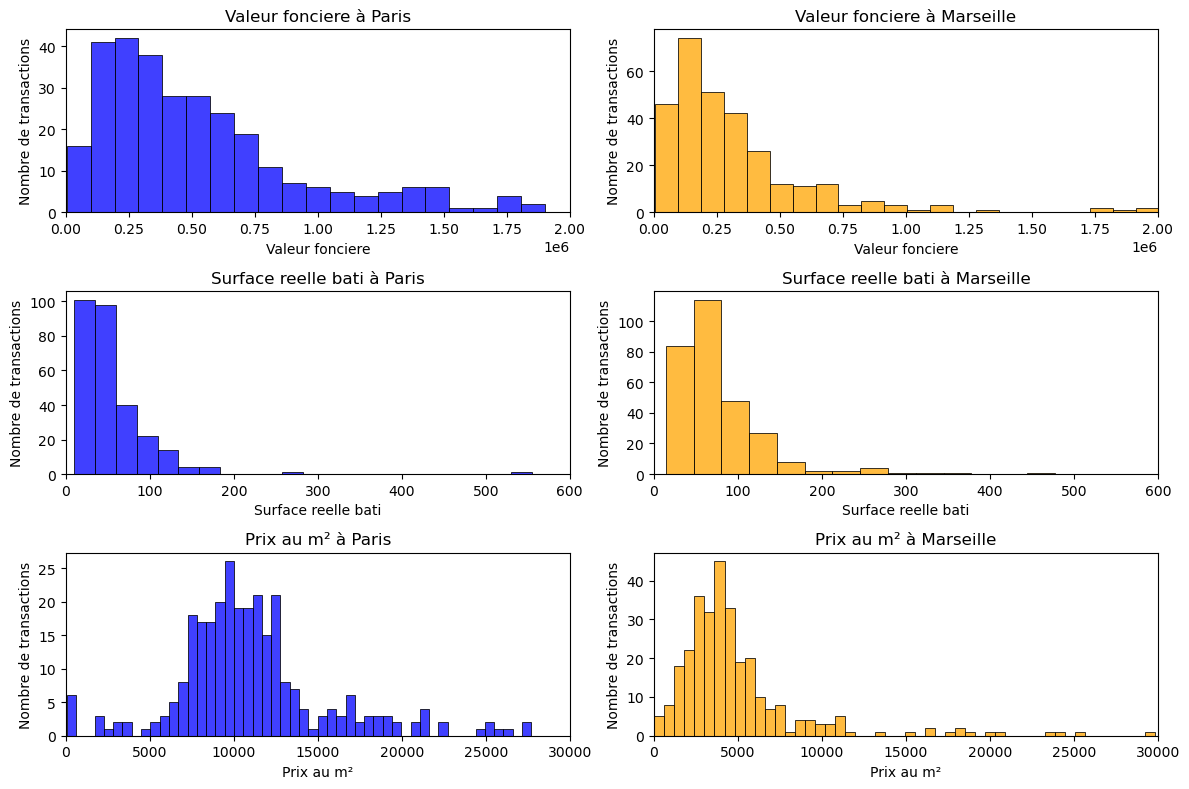

In [36]:


colors = ['blue', 'orange']

# Colonnes à visualiser
columns_to_visualize = ['Valeur fonciere', 'Surface reelle bati', "Prix au m²"]

plt.figure(figsize=(12, 8))

# Boucle sur chaque variable
for col in columns_to_visualize:
    # Sous-tracés pour Paris et Marseille
    for dept in [75, 13]:
        plt.subplot(3, 2, columns_to_visualize.index(col)*2 + [1, 2][dept == 13])  # Pour aligner Paris et Marseille côte à côte
        sample_data_dept = df_2023_visu.sample(n=10000)
        sns.histplot(sample_data_dept[sample_data_dept['Code departement']== dept][col], bins=50, color=colors[dept == 13])
        plt.xlabel(col)
        plt.ylabel('Nombre de transactions')
        plt.title(f'{col} à {"Marseille" if dept == 13 else "Paris"}')
        plt.xlim(0, 2000000 if col == 'Valeur fonciere' else (600 if col == 'Surface reelle bati' else 30000))

plt.tight_layout()
plt.show()


D'après les premiers histogrammes Valeur foncière, on peut voir que la plupart des transactions sont concentrées autour de 250 000 € à 500 000 €, tandis qu'à Marseille, elles sont autour de 200 000 € à 400 000 €.

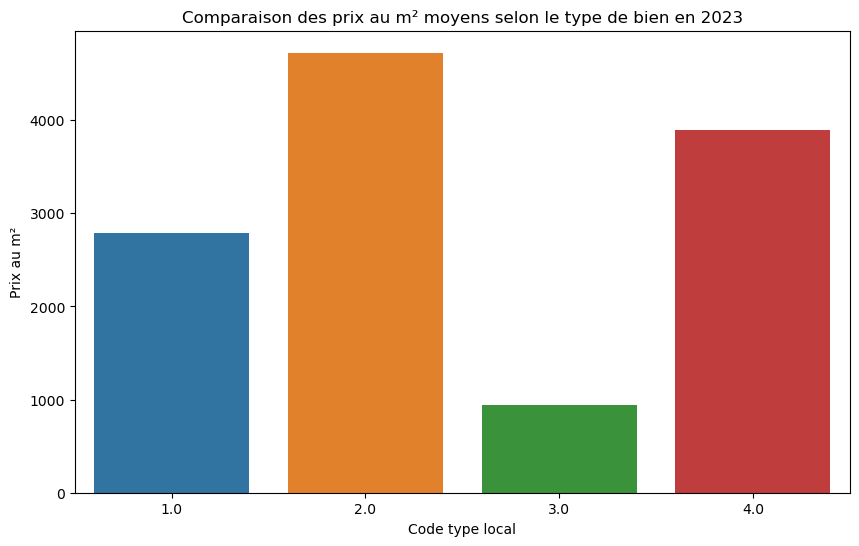

In [37]:
mean_type_local = df_cleaned_2023.groupby('Code type local')['Prix au m²'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='Code type local', y='Prix au m²', data=mean_type_local)
plt.title('Comparaison des prix au m² moyens selon le type de bien en 2023')
plt.xlabel('Code type local')
plt.ylabel('Prix au m²')
plt.show()

Pour le type de bien de code 2 (Appartement), le prix au m² moyen est de 4500€

# Graphique à barres représentant le prix moyen par m² pour chaque département
Nous distingons bien que le 75 est bien plus cher que les autres départements en général

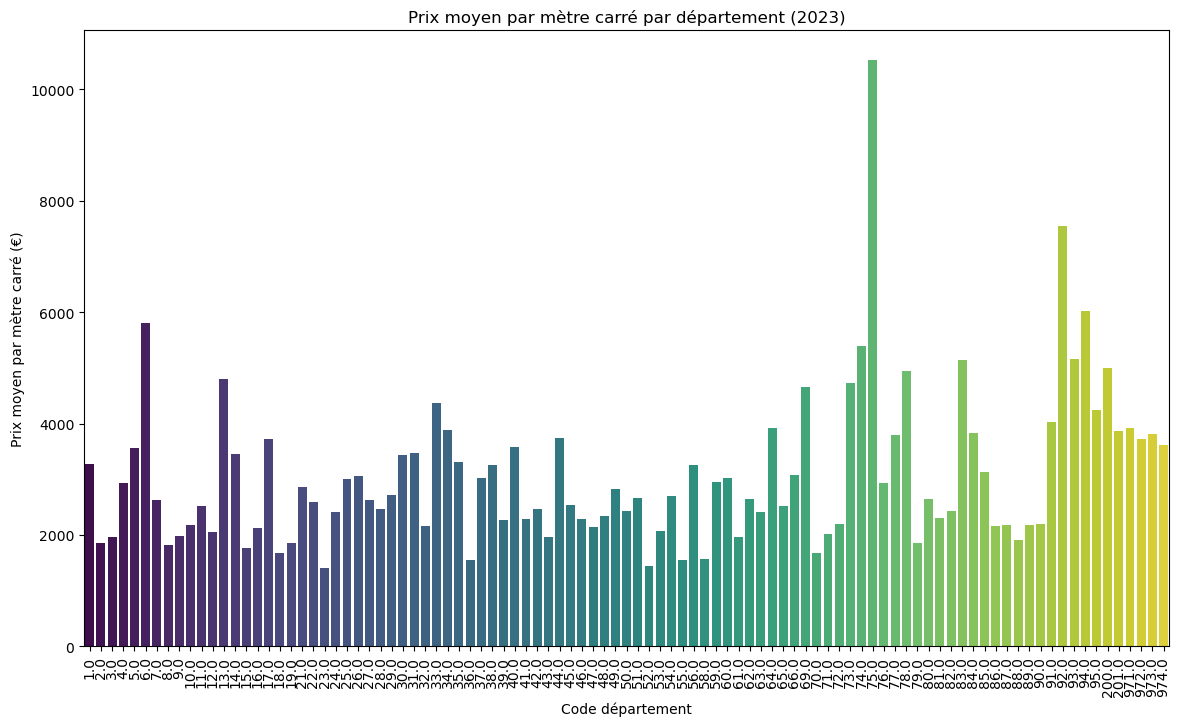

In [38]:
# Calculer le prix moyen par m² par département
mean_price_by_department = df_cleaned_2023.groupby('Code departement')['Prix au m²'].mean().reset_index()

#  graphique à barres
plt.figure(figsize=(14, 8))
sns.barplot(x='Code departement', y='Prix au m²', data=mean_price_by_department, palette='viridis')
plt.title('Prix moyen par mètre carré par département (2023)')
plt.xlabel('Code département')
plt.ylabel('Prix moyen par mètre carré (€)')
plt.xticks(rotation=90)
plt.show()


# Grapique de dispersion en comparant Paris Marseille et Lyon
(Valeur foncière en fonction du prix au m²)
on se rend compte que les 2 sont fortements corrélés

In [39]:
df_cleaned_2023

Valeur fonciere  Code postal  Code departement  Code commune  \
2              1070000.0       1630.0               1.0           354   
3               152200.0       1450.0               1.0           404   
4               269000.0       1800.0               1.0           361   
7               770000.0       1210.0               1.0           281   
14               85520.0       1340.0               1.0            24   
...                  ...          ...               ...           ...   
3726993         145000.0      75016.0              75.0           116   
3726994         212000.0      75015.0              75.0           115   
3726995         144000.0      75015.0              75.0           115   
3726998        3931000.0      75007.0              75.0           107   
3727004          98250.0      75015.0              75.0           115   

         Section  No plan  Nombre de lots  Code type local  \
2           32.0      336               1              2.0   
3           82.0     2317               0              1.0   
4           28.0     2405               0              1.0   
7            5.0       41               0              1.0   
14          10.0      127               0              1.0   
...          ...      ...             ...              ...   
3726993    147.0      122               2              2.0   
3726994     12.0        1               1              2.0   
3726995     12.0        1               1              2.0   
3726998     49.0        4               3              2.0   
3727004    158.0      100               1              2.0   

         Surface reelle bati  Nombre pieces principales  Surface terrain  \
2                      233.0                        8.0            233.0   
3                       64.0                        3.0            988.0   
4                       73.0                        3.0            835.0   
7                      136.0                        7.0            921.0   
14                     160.0                        5.0            160.0   
...                      ...                        ...              ...   
3726993                 18.0                        2.0             18.0   
3726994                 26.0                        1.0             26.0   
3726995                 15.0                        1.0             15.0   
3726998                206.0                        6.0            206.0   
3727004                 18.0                        1.0             18.0   

         Surface Carrez Totale    Prix au m²  Date_numeric  \
2                          0.0   4592.274678             4   
3                          0.0   2378.125000             2   
4                          0.0   3684.931507             4   
7                          0.0   5661.764706             2   
14                         0.0    534.500000             5   
...                        ...           ...           ...   
3726993                    0.0   8055.555556            60   
3726994                    0.0   8153.846154            46   
3726995                    0.0   9600.000000            46   
3726998                    0.0  19082.524272           277   
3727004                    0.0   5458.333333           361   

         nature_mutation_encoded  
2                       0.991240  
3                       0.991240  
4                       0.991240  
7                       0.991240  
14                      0.991240  
...                          ...  
3726993                 0.002138  
3726994                 0.002138  
3726995                 0.002138  
3726998                 0.002138  
3727004                 0.991240  

[1094471 rows x 15 columns]

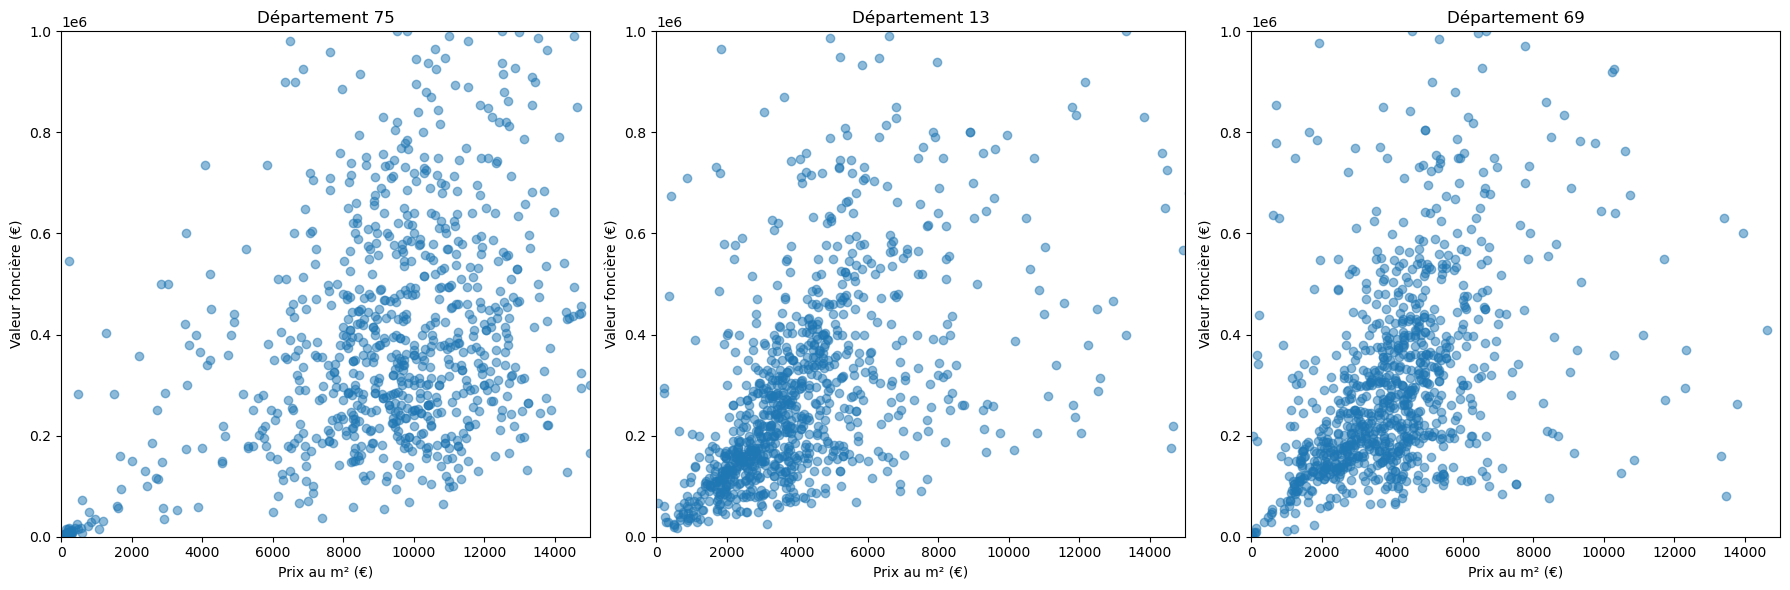

In [40]:
plt.figure(figsize=(18, 6))

for i, dept in enumerate([75,13,69]):
    sample_df = df_cleaned_2023[df_cleaned_2023['Code departement'] == dept].sample(n=1000)

    plt.subplot(1, 3, i + 1)
    plt.scatter(sample_df['Prix au m²'], sample_df['Valeur fonciere'], alpha=0.5)
    plt.title(f'Département {dept}')
    plt.xlabel('Prix au m² (€)')
    plt.ylabel('Valeur foncière (€)')
    plt.xlim(0, 15000)
    plt.ylim(0, 1000000)

plt.tight_layout()
plt.show()

In [41]:
moyenne_prix_m2_par_departement = df_cleaned_2023.groupby('Code departement')['Prix au m²'].mean().reset_index()
moyenne_prix_m2_par_departement.columns = ['Code departement', 'Moyenne Prix au m² par Departement']

# Fusionner avec le DataFrame d'origine
df_cleaned_2023 = df_cleaned_2023.merge(moyenne_prix_m2_par_departement, on='Code departement', how='left')

df_cleaned_2023 =df_cleaned_2023[((df_cleaned_2023['Valeur fonciere'] / df_cleaned_2023['Surface reelle bati']) > (df_cleaned_2023['Moyenne Prix au m² par Departement'] - 5000)) &
    ((df_cleaned_2023['Valeur fonciere'] / df_cleaned_2023['Surface reelle bati']) < (df_cleaned_2023['Moyenne Prix au m² par Departement'] + 5000))]

In [42]:
df_cleaned_2023

Valeur fonciere  Code postal  Code departement  Code commune  \
0              1070000.0       1630.0               1.0           354   
1               152200.0       1450.0               1.0           404   
2               269000.0       1800.0               1.0           361   
3               770000.0       1210.0               1.0           281   
4                85520.0       1340.0               1.0            24   
...                  ...          ...               ...           ...   
1094463         303000.0      75016.0              75.0           116   
1094464         258070.0      75015.0              75.0           115   
1094466         145000.0      75016.0              75.0           116   
1094467         212000.0      75015.0              75.0           115   
1094468         144000.0      75015.0              75.0           115   

         Section  No plan  Nombre de lots  Code type local  \
0           32.0      336               1              2.0   
1           82.0     2317               0              1.0   
2           28.0     2405               0              1.0   
3            5.0       41               0              1.0   
4           10.0      127               0              1.0   
...          ...      ...             ...              ...   
1094463     19.0       25               1              2.0   
1094464    130.0       17               1              2.0   
1094466    147.0      122               2              2.0   
1094467     12.0        1               1              2.0   
1094468     12.0        1               1              2.0   

         Surface reelle bati  Nombre pieces principales  Surface terrain  \
0                      233.0                        8.0            233.0   
1                       64.0                        3.0            988.0   
2                       73.0                        3.0            835.0   
3                      136.0                        7.0            921.0   
4                      160.0                        5.0            160.0   
...                      ...                        ...              ...   
1094463                 33.0                        2.0             33.0   
1094464                 20.0                        1.0             20.0   
1094466                 18.0                        2.0             18.0   
1094467                 26.0                        1.0             26.0   
1094468                 15.0                        1.0             15.0   

         Surface Carrez Totale    Prix au m²  Date_numeric  \
0                          0.0   4592.274678             4   
1                          0.0   2378.125000             2   
2                          0.0   3684.931507             4   
3                          0.0   5661.764706             2   
4                          0.0    534.500000             5   
...                        ...           ...           ...   
1094463                    0.0   9181.818182           302   
1094464                    0.0  12903.500000           298   
1094466                    0.0   8055.555556            60   
1094467                    0.0   8153.846154            46   
1094468                    0.0   9600.000000            46   

         nature_mutation_encoded  Moyenne Prix au m² par Departement  
0                       0.991240                         3266.683374  
1                       0.991240                         3266.683374  
2                       0.991240                         3266.683374  
3                       0.991240                         3266.683374  
4                       0.991240                         3266.683374  
...                          ...                                 ...  
1094463                 0.991240                        10535.317067  
1094464                 0.991240                        10535.317067  
1094466                 0.002138                        10535.317067  
1094467            

In [43]:
moyenne_prix_m2_par_departement['Code departement'] = moyenne_prix_m2_par_departement['Code departement'].astype(int).astype(str).str.zfill(2)

moyenne_prix_m2_par_departement['Prix_au_m²_format'] = moyenne_prix_m2_par_departement['Moyenne Prix au m² par Departement'].apply(lambda x: f"{x:,.2f} €".replace(',', ' ').replace('.', ','))

geojson_url = 'https://france-geojson.gregoiredavid.fr/repo/departements.geojson'
departements_geojson = gpd.read_file(geojson_url)

fig = px.choropleth_mapbox(
    moyenne_prix_m2_par_departement,
    geojson=departements_geojson,
    featureidkey="properties.code",
    locations='Code departement',
    color='Moyenne Prix au m² par Departement',
    color_continuous_scale="Viridis",
    mapbox_style="carto-positron",
    zoom=5,
    center={"lat": 46.603354, "lon": 1.888334},
    opacity=0.6,
    labels={'Prix au m²': 'Moyenne Prix au m² par Departement'},
    title='Prix moyen par m² par département',
    hover_data={'Prix_au_m²_format': True, 'Moyenne Prix au m² par Departement': False}  # Utiliser la colonne formatée pour l'affichage
)

fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()
moyenne_prix_m2_par_departement

Code departement  Moyenne Prix au m² par Departement Prix_au_m²_format
0                01                         3266.683374        3 266,68 €
1                02                         1853.360733        1 853,36 €
2                03                         1964.260800        1 964,26 €
3                04                         2938.484907        2 938,48 €
4                05                         3564.638484        3 564,64 €
..              ...                                 ...               ...
92              201                         3859.467767        3 859,47 €
93              971                         3923.355675        3 923,36 €
94              972                         3720.372038        3 720,37 €
95              973                         3813.489478        3 813,49 €
96              974                         3619.809282        3 619,81 €

[97 rows x 3 columns]

-------------------------------------------------------------------------------------------------------------------------

# Normalisation de notre DF

In [44]:
scaler = StandardScaler()
df_norm_2023 = scaler.fit_transform(df_cleaned_2023)

In [45]:
df_norm_2023

array([[  3.1913583 ,  -1.78617068,  -0.5877269 , ...,  -1.70917088,
          0.08578546,  -0.19767201],
       [ -0.37659935,  -1.79271166,  -0.5877269 , ...,  -1.72865911,
          0.08578546,  -0.19767201],
       [  0.07746194,  -1.77999309,  -0.5877269 , ...,  -1.70917088,
          0.08578546,  -0.19767201],
       ...,
       [ -0.40458943,   0.88058634,   0.1314924 , ...,  -1.1635004 ,
        -11.6658531 ,   4.17839721],
       [ -0.14412619,   0.88055   ,   0.1314924 , ...,  -1.29991802,
        -11.6658531 ,   4.17839721],
       [ -0.40847694,   0.88055   ,   0.1314924 , ...,  -1.29991802,
        -11.6658531 ,   4.17839721]])

# Matrice de corrélation de nos différentes variables

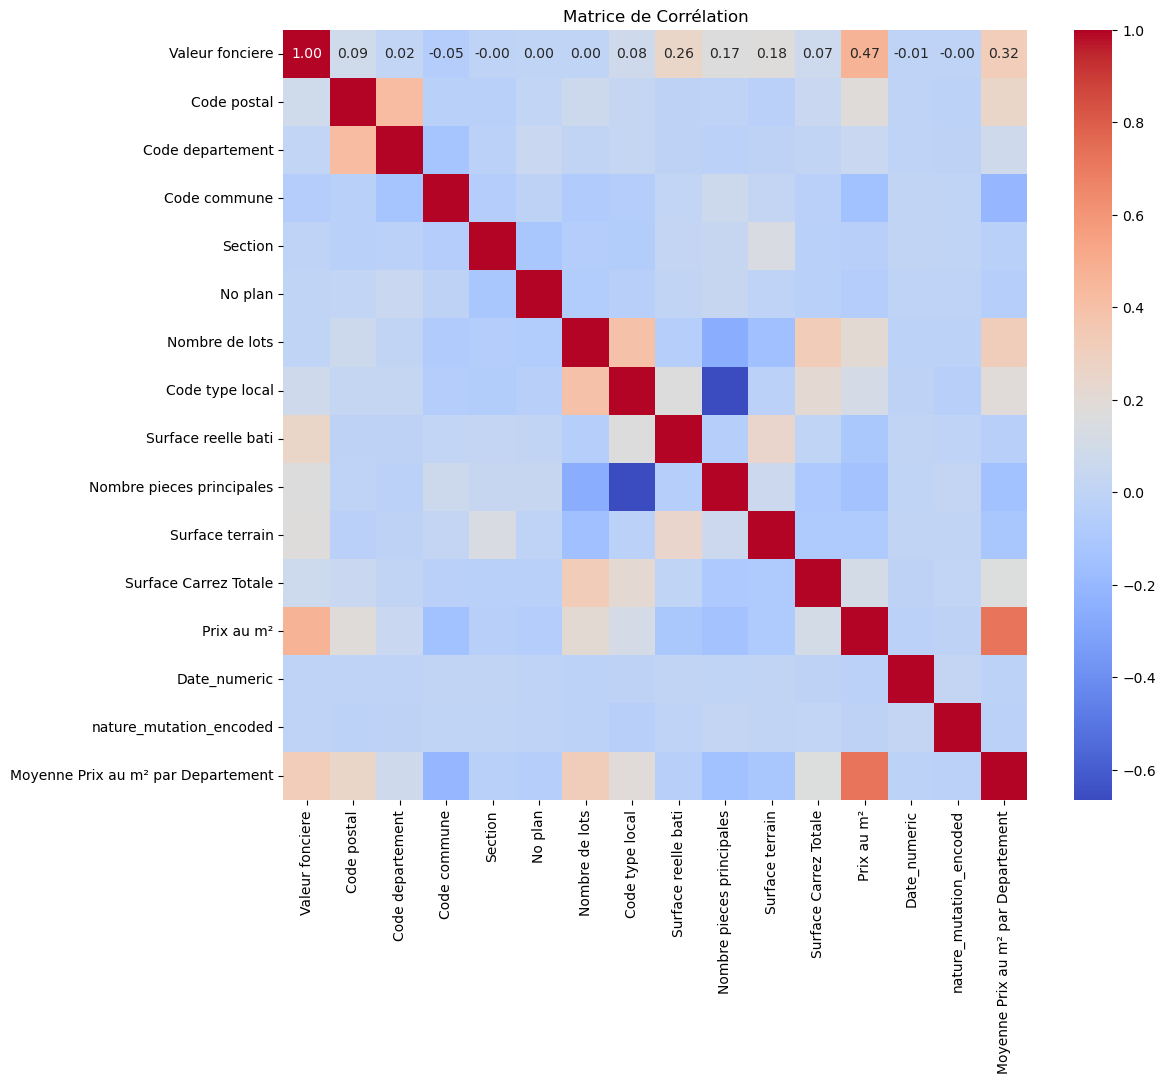

In [46]:
normalized_df = pd.DataFrame(df_norm_2023, columns=df_cleaned_2023.columns)
df_paris = df_cleaned_2023[df_cleaned_2023['Code departement'] == 75]
df_department = df_cleaned_2023[(df_cleaned_2023['Code departement'] == 75) & (df_cleaned_2023['Code type local'] == 2)]
correlation_matrix = normalized_df.corr()

# Visualisation avec une heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matrice de Corrélation')
plt.show()

# K-means

In [47]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.utils import resample

In [48]:
# Variables pour le clustering
variables_for_clustering = ['Valeur fonciere', 'Surface reelle bati', 'Nombre pieces principales', 'Code type local']

In [49]:
# Sélectionner les colonnes pour le clustering
df_clustering = df_cleaned_2023[variables_for_clustering]
df_clustering

Valeur fonciere  Surface reelle bati  Nombre pieces principales  \
0              1070000.0                233.0                        8.0   
1               152200.0                 64.0                        3.0   
2               269000.0                 73.0                        3.0   
3               770000.0                136.0                        7.0   
4                85520.0                160.0                        5.0   
...                  ...                  ...                        ...   
1094463         303000.0                 33.0                        2.0   
1094464         258070.0                 20.0                        1.0   
1094466         145000.0                 18.0                        2.0   
1094467         212000.0                 26.0                        1.0   
1094468         144000.0                 15.0                        1.0   

         Code type local  
0                    2.0  
1                    1.0  
2                    1.0  
3                    1.0  
4                    1.0  
...                  ...  
1094463              2.0  
1094464              2.0  
1094466              2.0  
1094467              2.0  
1094468              2.0  

[1036221 rows x 4 columns]

In [50]:
# Normaliser les données
scaler = StandardScaler()
df_clustering_scaled = scaler.fit_transform(df_clustering)

In [51]:
#Méthode du coude pour déterminer le nombre optimal de clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(df_clustering_scaled)
    wcss.append(kmeans.inertia_)

D:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

D:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

D:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

D:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

D:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_in

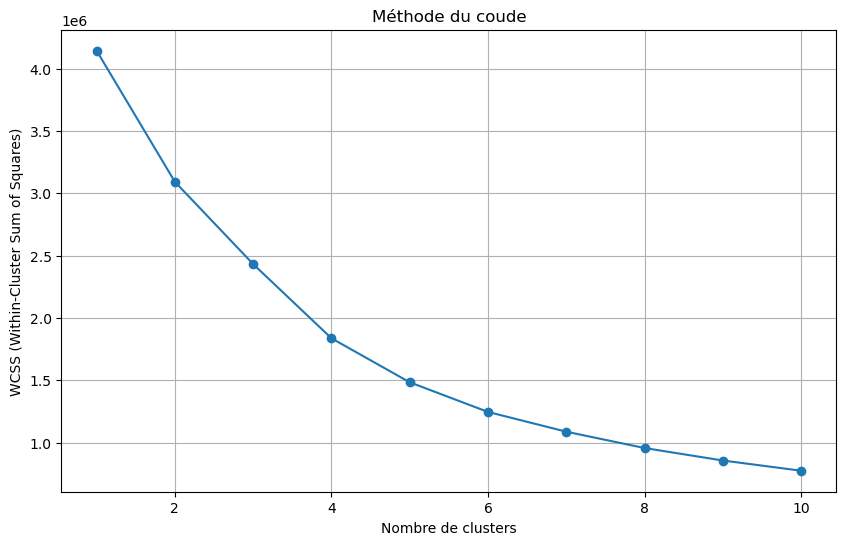

In [52]:
# Tracer la méthode du coude
plt.figure(figsize=(10, 6))

plt.plot(range(1, 11), wcss, marker='o')
plt.title('Méthode du coude')
plt.xlabel('Nombre de clusters')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.grid(True)

plt.show()

In [53]:
n_clusters_optimal = 3

In [54]:
# Ajuster le modèle de données avec PCA
pca = PCA()
pca.fit(df_clustering_scaled)

# Calculer la variance expliquée
explained_variance = pca.explained_variance_ratio_

In [55]:
# Trouver le nombre optimal de composantes pour la PCA
n_components_optimal = np.argmax(np.cumsum(explained_variance) >= 0.95) + 1
print(f'Nombre optimal de composantes: {n_components_optimal}')

Nombre optimal de composantes: 4


In [56]:
# Initialiser le modèle PCA avec le nombre optimal de composantes
pca_optimal = PCA(n_components=n_components_optimal)

# Appliquer PCA et transformer les données
principalComponents_optimal = pca_optimal.fit_transform(df_clustering_scaled)

In [57]:
# Créer un DataFrame pour les composantes principales
columns = [f'PC{i+1}' for i in range(n_components_optimal)]
principal_components_df = pd.DataFrame(data=principalComponents_optimal, columns=columns)

principal_components_df

PC1       PC2       PC3       PC4
0        1.453114  3.160973 -1.852060  1.416096
1        0.429628 -0.420018  0.304643 -0.517639
2        0.431249 -0.073742  0.029583 -0.623297
3        1.956829  1.964335 -1.047173  0.475685
4        1.138931 -0.190862  0.685048  0.311461
...           ...       ...       ...       ...
1036216 -0.777906 -0.118547 -0.401947 -0.209776
1036217 -1.156288 -0.395760 -0.328553 -0.556898
1036218 -0.778539 -0.591747 -0.035322 -0.066615
1036219 -1.162198 -0.516188 -0.201609 -0.516008
1036220 -1.159962 -0.727531 -0.052601 -0.454020

[1036221 rows x 4 columns]

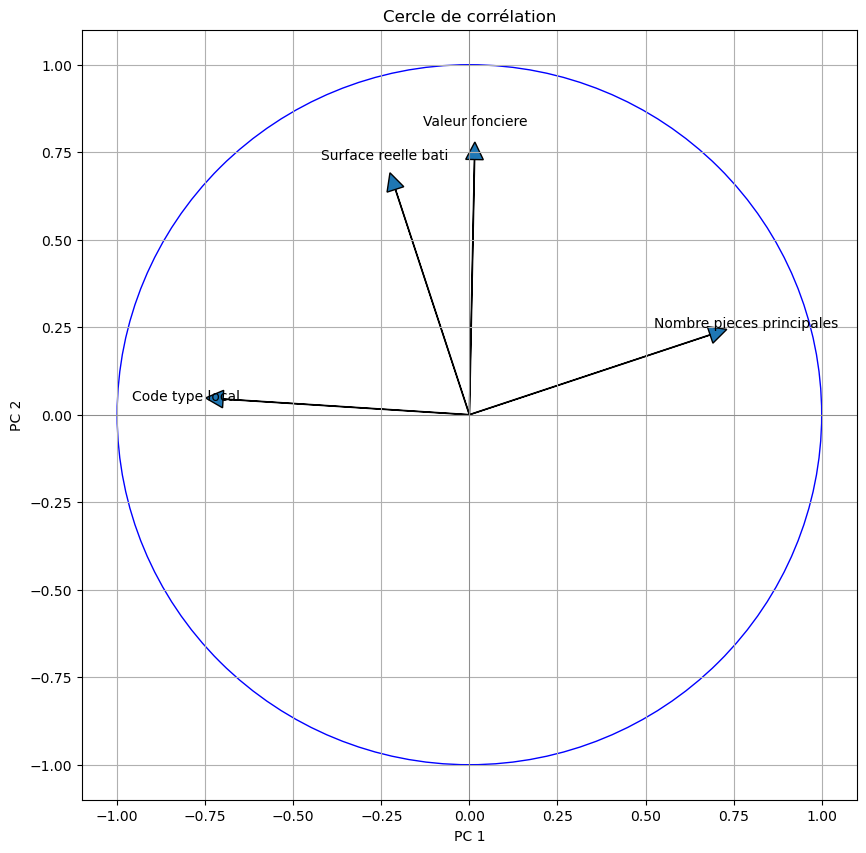

In [58]:
# recuperer les composantes principales
pcs = pca_optimal.components_

# Cercles de corrélation
def correlation_circle(pcs, labels):
    fig, ax = plt.subplots(figsize=(10, 10))
    for i in range(len(labels)):
        plt.arrow(0, 0, pcs[0, i], pcs[1, i], head_width=0.05, head_length=0.05)
        plt.text(pcs[0, i] * 1.15, pcs[1, i] * 1.15, labels[i], color='black', ha='center', va='center')

    circle = plt.Circle((0, 0), 1, color='blue', fill=False)
    ax.add_artist(circle)
    plt.xlim(-1.1, 1.1)
    plt.ylim(-1.1, 1.1)
    plt.xlabel('PC 1')
    plt.ylabel('PC 2')
    plt.grid(True)
    plt.axhline(0, color='grey', lw=0.5)
    plt.axvline(0, color='grey', lw=0.5)
    plt.title('Cercle de corrélation')
    plt.show()

# Noms des caractéristiques
labels = variables_for_clustering

# Tracer le cercle de corrélation
correlation_circle(pcs, labels)

In [59]:
# Appliquer K-means avec le nombre optimal de clusters
kmeans = KMeans(n_clusters=n_clusters_optimal, random_state=42)
clusters = kmeans.fit_predict(principalComponents_optimal)

D:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [60]:
# Ajouter les clusters au DataFrame original
df_cleaned_2023['Cluster'] = clusters
df_cleaned_2023

Valeur fonciere  Code postal  Code departement  Code commune  \
0              1070000.0       1630.0               1.0           354   
1               152200.0       1450.0               1.0           404   
2               269000.0       1800.0               1.0           361   
3               770000.0       1210.0               1.0           281   
4                85520.0       1340.0               1.0            24   
...                  ...          ...               ...           ...   
1094463         303000.0      75016.0              75.0           116   
1094464         258070.0      75015.0              75.0           115   
1094466         145000.0      75016.0              75.0           116   
1094467         212000.0      75015.0              75.0           115   
1094468         144000.0      75015.0              75.0           115   

         Section  No plan  Nombre de lots  Code type local  \
0           32.0      336               1              2.0   
1           82.0     2317               0              1.0   
2           28.0     2405               0              1.0   
3            5.0       41               0              1.0   
4           10.0      127               0              1.0   
...          ...      ...             ...              ...   
1094463     19.0       25               1              2.0   
1094464    130.0       17               1              2.0   
1094466    147.0      122               2              2.0   
1094467     12.0        1               1              2.0   
1094468     12.0        1               1              2.0   

         Surface reelle bati  Nombre pieces principales  Surface terrain  \
0                      233.0                        8.0            233.0   
1                       64.0                        3.0            988.0   
2                       73.0                        3.0            835.0   
3                      136.0                        7.0            921.0   
4                      160.0                        5.0            160.0   
...                      ...                        ...              ...   
1094463                 33.0                        2.0             33.0   
1094464                 20.0                        1.0             20.0   
1094466                 18.0                        2.0             18.0   
1094467                 26.0                        1.0             26.0   
1094468                 15.0                        1.0             15.0   

         Surface Carrez Totale    Prix au m²  Date_numeric  \
0                          0.0   4592.274678             4   
1                          0.0   2378.125000             2   
2                          0.0   3684.931507             4   
3                          0.0   5661.764706             2   
4                          0.0    534.500000             5   
...                        ...           ...           ...   
1094463                    0.0   9181.818182           302   
1094464                    0.0  12903.500000           298   
1094466                    0.0   8055.555556            60   
1094467                    0.0   8153.846154            46   
1094468                    0.0   9600.000000            46   

         nature_mutation_encoded  Moyenne Prix au m² par Departement  Cluster  
0                       0.991240                         3266.683374        0  
1                       0.991240                         3266.683374        0  
2                       0.991240                         3266.683374        0  
3                       0.991240                         3266.683374        0  
4                       0.991240                         3266.683374        0  
...                          ...                                 ...      ...  
1094463                 0.991240                        10535.317067        2  
1094464                 0.991240                        10535.317067        2  
1094466  

In [61]:
'''# Examiner les Centroids des Clusters
centroids = kmeans.cluster_centers_
print("Centroids des clusters:")
print(centroids)'''

'# Examiner les Centroids des Clusters\ncentroids = kmeans.cluster_centers_\nprint("Centroids des clusters:")\nprint(centroids)'

In [62]:
# Comparer les clusters aux données initiales
initial_summary = df_cleaned_2023[variables_for_clustering].mean()
print("Moyennes des caractéristiques initiales:")
print(initial_summary)

Moyennes des caractéristiques initiales:
Valeur fonciere              249074.155996
Surface reelle bati             109.826385
Nombre pieces principales         3.273753
Code type local                   1.605387
dtype: float64


In [63]:
for cluster in sorted(df_cleaned_2023['Cluster'].unique()):
    cluster_data = df_cleaned_2023[df_cleaned_2023['Cluster'] == cluster]
    cluster_mean = cluster_data[variables_for_clustering].mean()
    print(f"Moyennes des caractéristiques pour le Cluster {cluster}:")
    print(cluster_mean)
    print()

Moyennes des caractéristiques pour le Cluster 0:
Valeur fonciere              268943.828936
Surface reelle bati             102.471565
Nombre pieces principales         4.290925
Code type local                   1.133893
dtype: float64

Moyennes des caractéristiques pour le Cluster 1:
Valeur fonciere              1.375376e+06
Surface reelle bati          8.487179e+03
Nombre pieces principales    0.000000e+00
Code type local              4.000000e+00
dtype: float64

Moyennes des caractéristiques pour le Cluster 2:
Valeur fonciere              214817.197280
Surface reelle bati              94.535864
Nombre pieces principales         1.713863
Code type local                   2.325660
dtype: float64



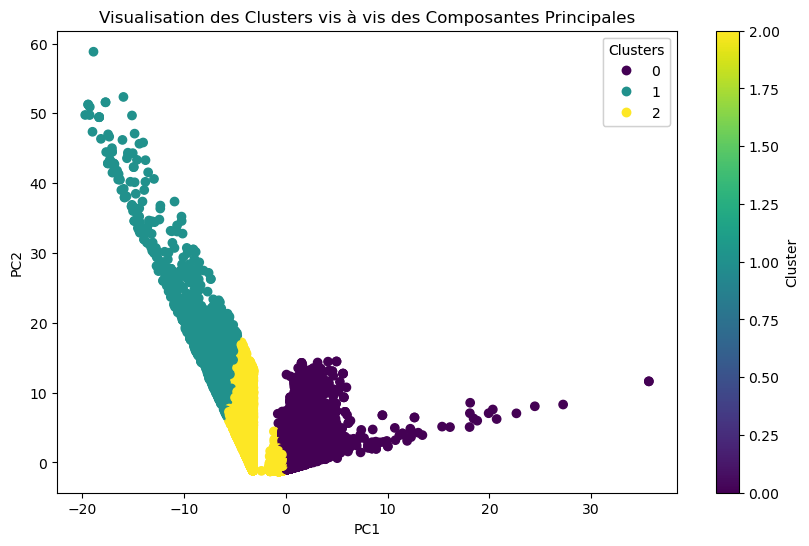

In [64]:
# Interprétation et Visualisation des Clusters
df_pca = pd.DataFrame(principalComponents_optimal, columns=[f'PC{i}' for i in range(1, 5)])
df_pca['Cluster'] = clusters

plt.figure(figsize=(10, 6))
scatter = plt.scatter(df_pca['PC1'], df_pca['PC2'], c=df_pca['Cluster'], cmap='viridis')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Visualisation des Clusters vis à vis des Composantes Principales')

# Ajouter une légende personnalisée pour les clusters
legend1 = plt.legend(*scatter.legend_elements(), title="Clusters")
plt.gca().add_artist(legend1)

plt.colorbar(scatter, label='Cluster')
plt.show()

In [65]:
sample_size = 10000 # Ajustez cette valeur selon la mémoire disponible

# Échantillonnage des données
sampled_data, sampled_clusters = resample(principalComponents_optimal, clusters, n_samples=sample_size, random_state=42)

# Calculer le score de silhouette sur l'échantillon
silhouette_avg = silhouette_score(sampled_data, sampled_clusters)

# Arrondir à deux décimales
rounded_silhouette_avg = round(silhouette_avg, 1)

print(f'Silhouette Score (échantillon): {rounded_silhouette_avg}')

Silhouette Score (échantillon): 0.4


# ML Aprentissage Supervisé
Déterminer le prix d'un appartement d'une ville en prenant en compte les données du département de la ville
# POUR CHOISIR LA VILLE DE LA PREDICTION : ENTRER CI DESSOUS
# LE CODE DEPARTEMENT ET CODE POSTAL

In [66]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [67]:

Code_departement = 75
code_postal_predire = 75016
df_code_departement = df_cleaned_2023[(df_cleaned_2023['Code departement'] == Code_departement) & (df_cleaned_2023['Code type local'] == 2)]

In [68]:
features = ['Code postal','Nombre de lots', 'Surface reelle bati',
            'Surface terrain','Surface Carrez Totale', 'Prix au m²','nature_mutation_encoded']
target = 'Valeur fonciere'
X = df_code_departement[features]
y = df_code_departement[target]
X = X[X['Prix au m²']<30000]
y = y[X.index]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Entraîner le modèle de régression linéaire
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Faire des prédictions

y_train_pred = model.predict(X_train_scaled)
y_test_pred = model.predict(X_test_scaled)

# Évaluer le modèle
train_relative_error = np.mean(np.abs((y_train - y_train_pred) / y_train))
test_relative_error = np.mean(np.abs((y_test - y_test_pred) / y_test))
train_score = model.score(X_train_scaled, y_train)
test_score = model.score(X_test_scaled, y_test)


print('Train Relative Error: ',round(train_relative_error,2))
print('Test Relative Error: ',round(test_relative_error,2))
print('Train Score: ',round(train_score,2))
print('Test Score: ',round(test_score,2))

Train Relative Error:  0.15
Test Relative Error:  0.16
Train Score:  0.97
Test Score:  0.96


In [69]:
moyenne_prix_m2_paris = df_cleaned_2023.groupby('Code postal')['Prix au m²'].mean().reset_index()
moyenne_prix_m2_paris.columns = ['Code postal', 'Moyenne Prix au m²']

moyenne_prix_m2_code_postal = moyenne_prix_m2_paris[moyenne_prix_m2_paris['Code postal'] == code_postal_predire]['Moyenne Prix au m²'].values[0]
print("le prix au m² est de :",round(moyenne_prix_m2_code_postal,2),"€")
# ['Code postal', 'Nombre de lots', 'Surface reelle bati', 'Surface terrain',
#'Surface Carrez Totale', 'Prix au m²','nature_mutation_encoded']
new_data = np.array([[code_postal_predire, 1, 50,0, 50, moyenne_prix_m2_code_postal, 1]])
new_data_scaled = scaler.transform(new_data)
predicted_price = model.predict(new_data_scaled)

le prix au m² est de : 11136.29 €


D:\Anaconda\Lib\site-packages\sklearn\base.py:439: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



Prix prédit pour l'appartement:  573016.57  €


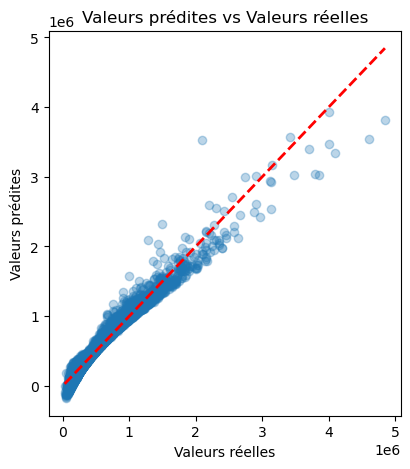

In [70]:
# Graphique des valeurs prédites vs valeurs réelles
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_test_pred, alpha=0.3)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
plt.xlabel('Valeurs réelles')
plt.ylabel('Valeurs prédites')

plt.title('Valeurs prédites vs Valeurs réelles')
print('Prix prédit pour l\'appartement: ',round(predicted_price[0],2),' €')